In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chess
from beschess.utils import packed_to_board

%load_ext autoreload
%autoreload 2

In [2]:
boards = np.load('../data/processed/boards_packed.npy', mmap_mode='r')
tags = np.load('../data/processed/tags_packed.npy', mmap_mode='r')
tag_names = np.load('../data/processed/tag_classes.npy', allow_pickle=True)

print(f"Loaded Dataset:")
print(f" - Boards:\t{boards.shape}\t(Type: {boards.dtype})")
print(f" - Tags:\t{tags.shape}\t(Type: {tags.dtype})")
print(f" - Classes:\t{len(tag_names)} tags")

Loaded Dataset:
 - Boards:	(4170411, 69)	(Type: int8)
 - Tags:	(4170411, 8)	(Type: int8)
 - Classes:	8 tags


In [3]:
tag_names

array(['LinearAttack', 'DoubleAttack', 'MatingNet', 'Overload',
       'Displacement', 'Sacrifice', 'EndgameTactic', 'PieceEndgame'],
      dtype=object)

In [4]:
max_tags_per_board = np.max(np.sum(tags, axis=1))
min_tags_per_board = np.min(np.sum(tags, axis=1))
tag_counts = np.sum(tags, axis=1)
print(f" - Max Tags per Board: {max_tags_per_board}")
print(f" - Min Tags per Board: {min_tags_per_board}")
print(f" - Average Tags per Board: {np.mean(tag_counts):.2f} ± {np.std(tag_counts):.2f}")

 - Max Tags per Board: 7
 - Min Tags per Board: 1
 - Average Tags per Board: 1.35 ± 0.62


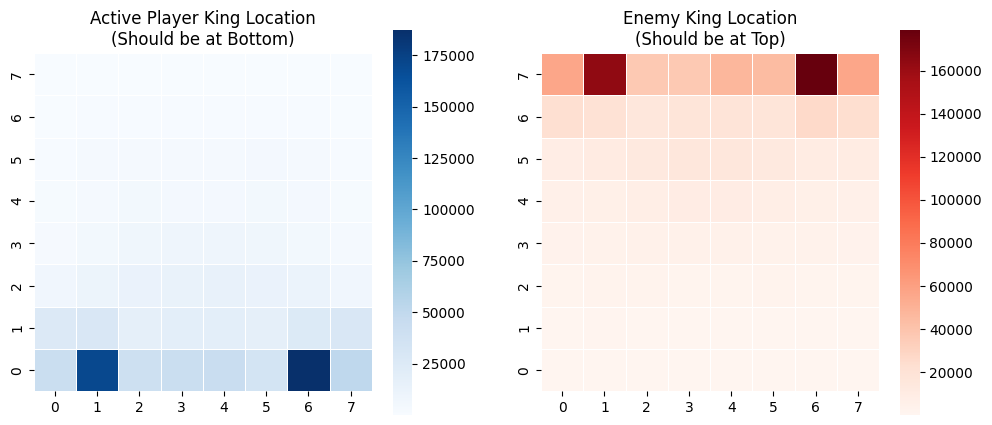

In [5]:
def plot_board_density(boards, sample_size=1_000_000):
    # Randomly sample indices
    indices = np.random.choice(len(boards), size=sample_size, replace=False)
    sample = boards[indices] # Shape (N, 64)
    
    # Initialize 8x8 grids
    # Friendly King is ID 6, Enemy King is ID 12
    friendly_king_map = np.zeros(64)
    enemy_king_map = np.zeros(64)
    
    # Vectorized counting (much faster than loops)
    # Count where board == 6 (Friendly King)
    for i in range(64):
        friendly_king_map[i] = np.sum(sample[:, i] == 6)
        enemy_king_map[i] = np.sum(sample[:, i] == 12)

    # Reshape to 8x8
    fk_grid = friendly_king_map.reshape(8, 8)
    ek_grid = enemy_king_map.reshape(8, 8)

    # Plot
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Friendly King (Active Player)
    sns.heatmap(fk_grid, ax=axes[0], cmap="Blues", linewidths=.5, square=True)
    axes[0].set_title("Active Player King Location\n(Should be at Bottom)")
    axes[0].invert_yaxis() # Rank 1 at bottom
    
    # Enemy King (Opponent)
    sns.heatmap(ek_grid, ax=axes[1], cmap="Reds", linewidths=.5, square=True)
    axes[1].set_title("Enemy King Location\n(Should be at Top)")
    axes[1].invert_yaxis()
    
    plt.show()

plot_board_density(boards)

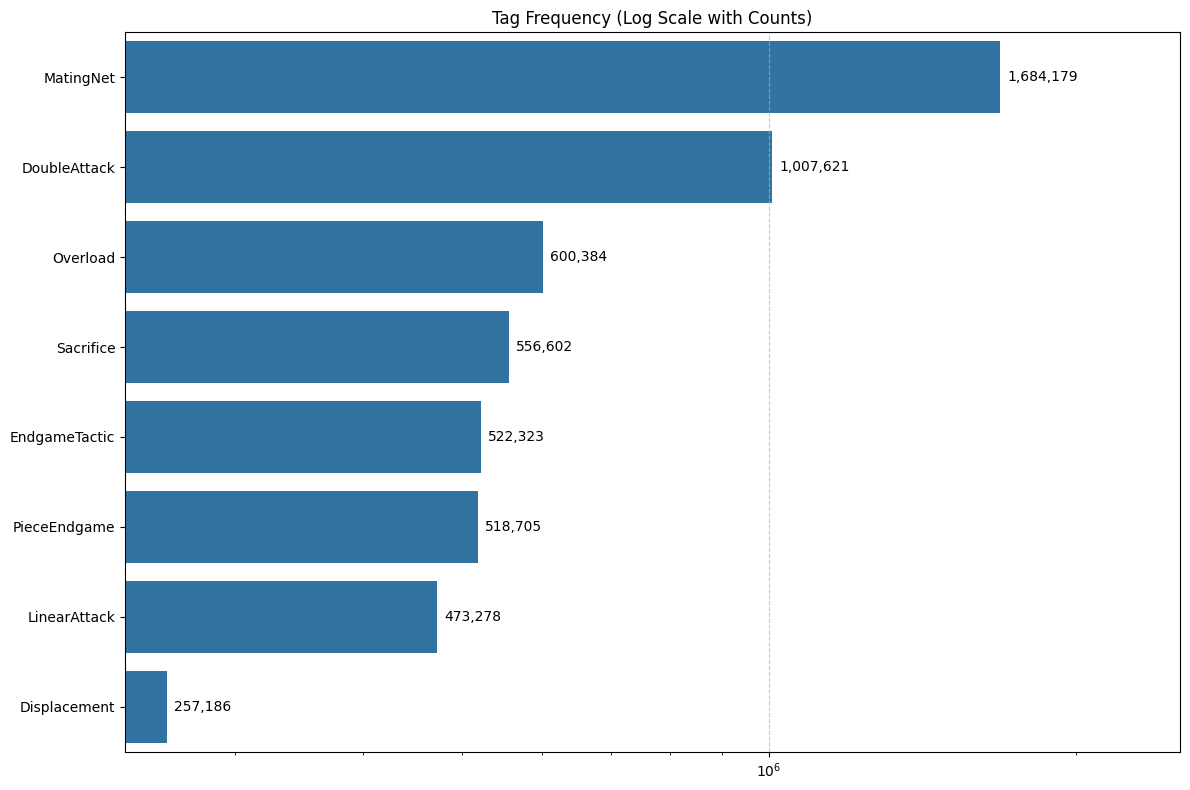

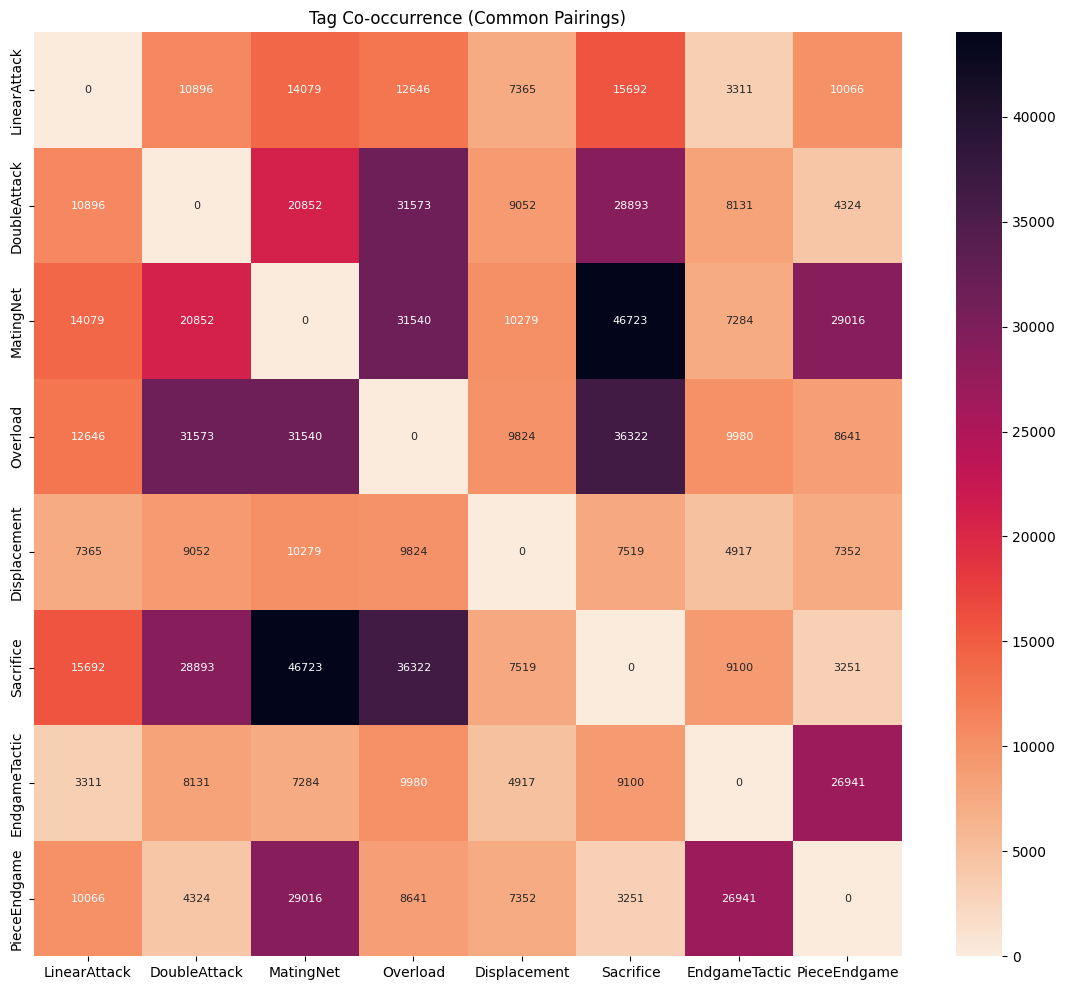

In [6]:
def plot_tag_stats(tags, tag_names):
    # 1. Frequency Calculation
    tag_counts = np.sum(tags, axis=0)
    
    # Sort by frequency
    sorted_indices = np.argsort(tag_counts)[::-1]
    sorted_names = tag_names[sorted_indices]
    sorted_counts = tag_counts[sorted_indices]
    
    # 2. Plotting
    plt.figure(figsize=(12, 8)) # Increased height slightly for readability
    
    # Create the barplot and capture the axes object 'ax'
    ax = sns.barplot(x=sorted_counts, y=sorted_names)
    
    # 3. Add Count Labels
    # fmt='{:,.0f}' adds comma separators (e.g., 1,000)
    # padding=5 adds space between the bar end and the text
    ax.bar_label(ax.containers[0], fmt='{:,.0f}', padding=5, fontsize=10)
    
    plt.xscale('log')
    # Add a little extra space on the right for the labels to fit
    plt.xlim(right=np.max(sorted_counts) * 1.5) 
    
    plt.title("Tag Frequency (Log Scale with Counts)")
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    # 4. Co-occurrence Matrix (Unchanged)
    subset = tags[:1_000_000].astype(np.float32)
    cooc = np.dot(subset.T, subset)
    np.fill_diagonal(cooc, 0)
    
    plt.figure(figsize=(14, 12))
    sns.heatmap(cooc, xticklabels=tag_names, yticklabels=tag_names, 
                cmap="rocket_r", robust=True, annot=True, fmt='.0f', annot_kws={"size": 8})
    plt.title("Tag Co-occurrence (Common Pairings)")
    plt.show()

# Run it
plot_tag_stats(tags, tag_names)

Sample Index: 2682139
Tags: ['MatingNet' 'Sacrifice']
Note: Visualized in Canonical Orientation (Active Player = White)
FEN: 5R2/p1q1k1p1/4p1b1/3p4/3N1P2/6K1/Pr1r4/4R2Q w - - 0 1
board has castle rights: False (white), False (black)
board has en passant square: None


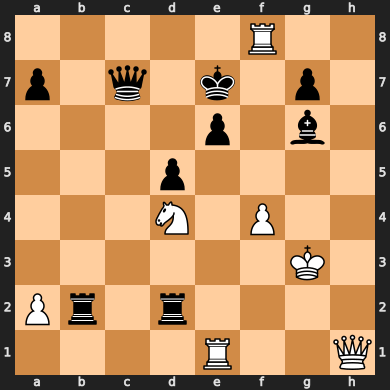

Sample Index: 3799619
Tags: ['MatingNet']
Note: Visualized in Canonical Orientation (Active Player = White)
FEN: 1k1q4/2p3p1/p1P1b3/2Q1pp1p/7P/1P2P3/PKP3P1/3r4 w - - 0 1
board has castle rights: False (white), False (black)
board has en passant square: None


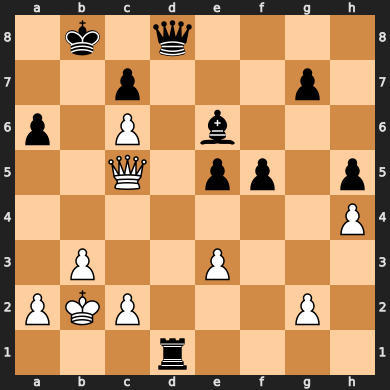

Sample Index: 1840376
Tags: ['MatingNet']
Note: Visualized in Canonical Orientation (Active Player = White)
FEN: 1kr4r/1ppq2bp/3p2p1/p3n3/3Q4/2NPB1P1/1PP4P/K1R4R w - - 0 1
board has castle rights: False (white), False (black)
board has en passant square: None


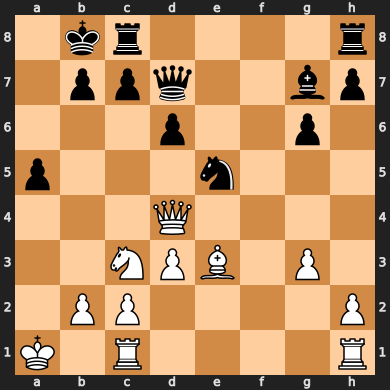

Sample Index: 1653419
Tags: ['MatingNet']
Note: Visualized in Canonical Orientation (Active Player = White)
FEN: 1kr1r3/1p2nq2/1P3p2/1p1p1b1p/Q4P2/1P4PP/P6R/K1R2B2 w - - 0 1
board has castle rights: False (white), False (black)
board has en passant square: None


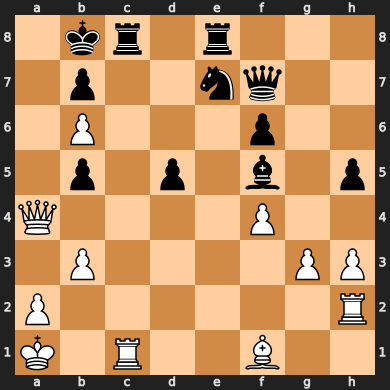

Sample Index: 1625248
Tags: ['Overload' 'EndgameTactic']
Note: Visualized in Canonical Orientation (Active Player = White)
FEN: 8/3k4/R2P4/2B5/KP2r3/6p1/8/5r2 w - - 0 1
board has castle rights: False (white), False (black)
board has en passant square: None


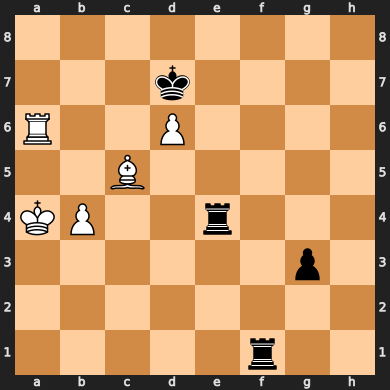

Sample Index: 389288
Tags: ['PieceEndgame']
Note: Visualized in Canonical Orientation (Active Player = White)
FEN: 8/8/8/2R1rk1p/8/6PK/8/8 w - - 0 1
board has castle rights: False (white), False (black)
board has en passant square: None


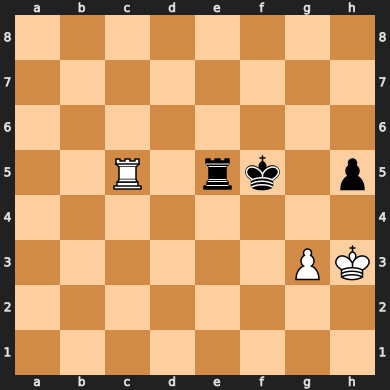

Sample Index: 1593859
Tags: ['MatingNet' 'PieceEndgame']
Note: Visualized in Canonical Orientation (Active Player = White)
FEN: 6k1/5ppp/8/8/2P1q3/7P/3Qp1PK/8 w - - 0 1
board has castle rights: False (white), False (black)
board has en passant square: None


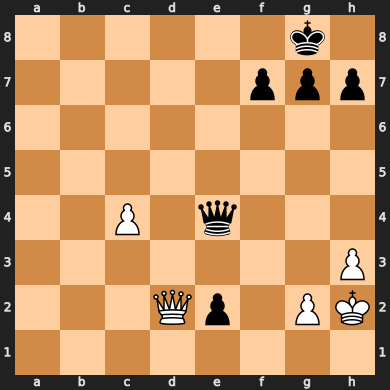

Sample Index: 1426117
Tags: ['MatingNet']
Note: Visualized in Canonical Orientation (Active Player = White)
FEN: r2q1r2/4p2k/p1npbp1B/1p4Q1/4p2P/1N6/PPP1B3/2K4R w - - 0 1
board has castle rights: False (white), False (black)
board has en passant square: None


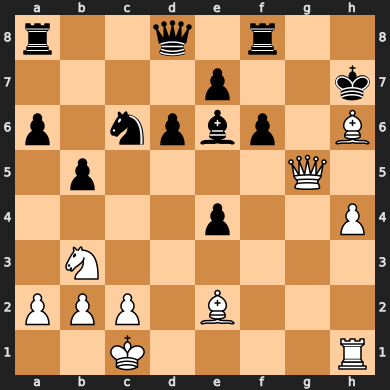

Sample Index: 1399549
Tags: ['DoubleAttack' 'PieceEndgame']
Note: Visualized in Canonical Orientation (Active Player = White)
FEN: 8/5k2/2p3p1/8/p4pq1/5RP1/6K1/4R3 w - - 0 1
board has castle rights: False (white), False (black)
board has en passant square: None


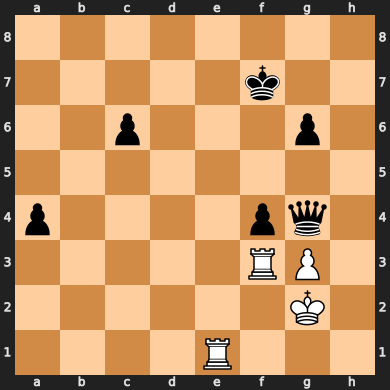

Sample Index: 3467267
Tags: ['MatingNet' 'PieceEndgame']
Note: Visualized in Canonical Orientation (Active Player = White)
FEN: 6k1/6p1/R3p1Pp/4P3/5K2/2P1P2P/pr6/3r4 w - - 0 1
board has castle rights: False (white), False (black)
board has en passant square: None


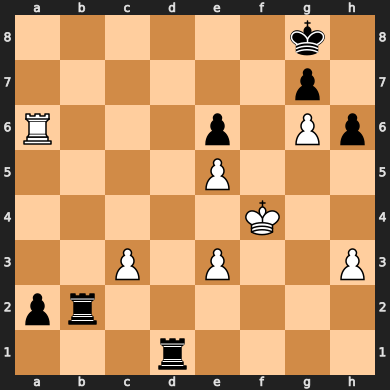

In [7]:
def inspect_sample(idx):
    # 1. Get Data
    board_data = boards[idx]
    tag_vector = tags[idx]
    
    # 2. Decode Tags
    # indices where vector is 1
    active_indices = np.where(tag_vector == 1)[0]
    current_tags = tag_names[active_indices]
    
    # 3. Render
    board = packed_to_board(board_data)
    
    print(f"Sample Index: {idx}")
    print(f"Tags: {current_tags}")
    print("Note: Visualized in Canonical Orientation (Active Player = White)")
    print(f"FEN: {board.fen()}")
    print(f"board has castle rights: {board.has_castling_rights(chess.WHITE)} (white), {board.has_castling_rights(chess.BLACK)} (black)")
    print(f"board has en passant square: {board.ep_square}")
    display(board, size=350)

for i in np.random.randint(0, len(boards), size=10):
    inspect_sample(i)

Total boards with packed en-passant != -1: 5491
Found valid en-passant at index 383
Packed ep field: 42
FEN: 1k3r2/5q1p/3b2p1/Q1pP4/1P1Bp3/3bP2P/P7/K1R5 w - c6 0 1
ep_square (int): 42, name: c6


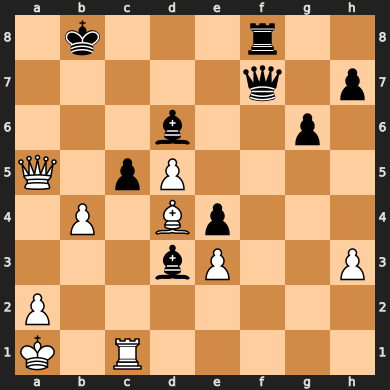

Found valid en-passant at index 774
Packed ep field: 40
FEN: 8/1p4pp/1p1k4/pP1P4/P2PK3/8/6P1/8 w - a6 0 1
ep_square (int): 40, name: a6


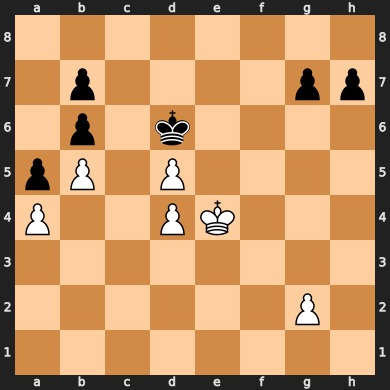

Found valid en-passant at index 1229
Packed ep field: 41
FEN: 8/k2q3p/p1rP2p1/PppQ4/8/1P6/K2R4/8 w - b6 0 1
ep_square (int): 41, name: b6


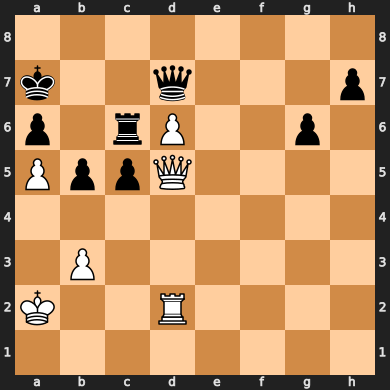

Found valid en-passant at index 1977
Packed ep field: 46
FEN: 6k1/5p2/4p3/3p1qpP/2rP3R/4QPK1/8/8 w - g6 0 1
ep_square (int): 46, name: g6


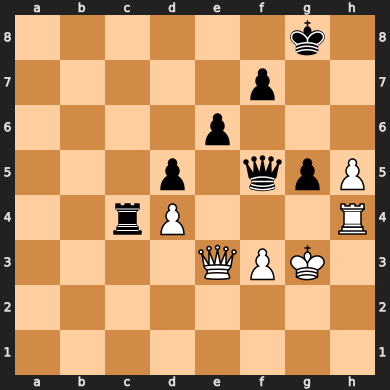

Found valid en-passant at index 2807
Packed ep field: 45
FEN: r4r1k/pb4p1/1n2p2p/1p2Pp2/8/2P4R/P1BB2PP/5RK1 w - f6 0 1
ep_square (int): 45, name: f6


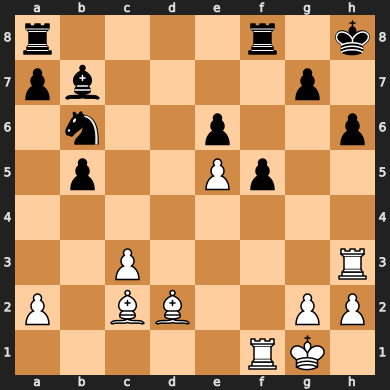

Found valid en-passant at index 3005
Packed ep field: 45
FEN: r2q2rk/pp1n2np/2p5/3pPp2/3P1Q1N/8/PPP2PPP/R4RK1 w - f6 0 1
ep_square (int): 45, name: f6


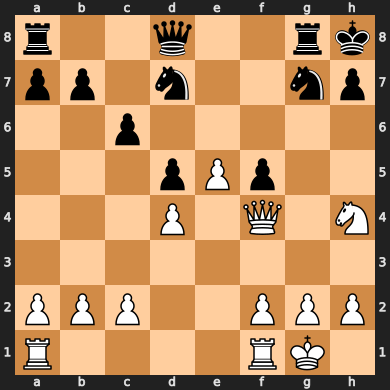

Found valid en-passant at index 3293
Packed ep field: 45
FEN: 8/4k2p/4p2P/2Pb1pP1/3K4/8/8/8 w - f6 0 1
ep_square (int): 45, name: f6


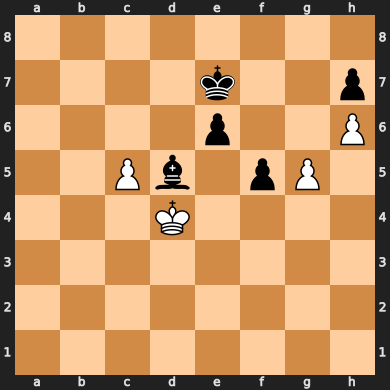

Found valid en-passant at index 4006
Packed ep field: 45
FEN: 2kr1bnr/ppp1q1pp/2bp4/4Pp2/5PQ1/1B6/PPP3PP/RNB2RK1 w - f6 0 1
ep_square (int): 45, name: f6


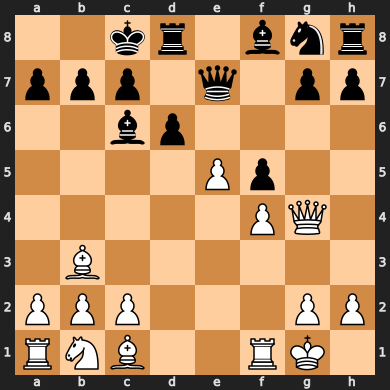

Found valid en-passant at index 4168
Packed ep field: 47
FEN: 8/6p1/1p1k4/pP4Pp/P2K4/8/7P/8 w - h6 0 1
ep_square (int): 47, name: h6


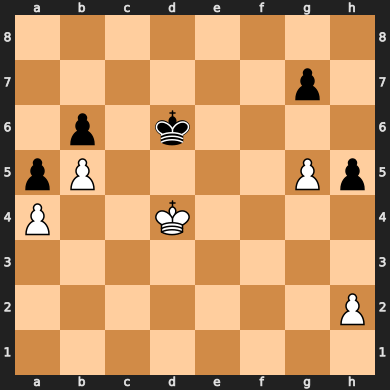

Found valid en-passant at index 4230
Packed ep field: 43
FEN: r2q1rk1/4npb1/ppn1pBpp/2ppP3/4N3/3P1N2/PPP2PPP/R2QR1K1 w - d6 0 1
ep_square (int): 43, name: d6


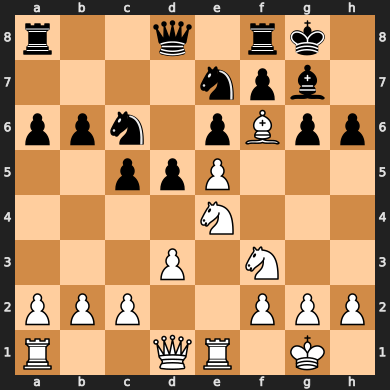

Packed en-passant flags present but reconstructed boards have no ep_square.


In [8]:
# Search for boards whose packed en-passant field (index 68) != -1,
# then reconstruct until we find one with a real en-passant square.
ep_field = boards[:, 68]
hits = np.where(ep_field != -1)[0]
print(f"Total boards with packed en-passant != -1: {hits.size}")

if hits.size == 0:
    print("No boards found with en-passant in packed representation.")
else:
    for idx in hits[:10]:
        packed_row = boards[idx]
        ep_value = int(packed_row[68])
        board = packed_to_board(packed_row)
        if board.ep_square is not None:
            print(f"Found valid en-passant at index {idx}")
            print(f"Packed ep field: {ep_value}")
            print(f"FEN: {board.fen()}")
            print(f"ep_square (int): {board.ep_square}, name: {chess.square_name(board.ep_square)}")
            display(board, size=350)
    else:
        print("Packed en-passant flags present but reconstructed boards have no ep_square.")